Import basic libraries and test and train data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv(r'E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques\train.csv')
test=pd.read_csv(r'E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques\test.csv')
globaldata = pd.concat([train,test])

Check NA value

In [2]:
pd.set_option('display.max_rows', 500)
((globaldata.isna().sum()/len(globaldata)*100).round(3))

Id                0.000
MSSubClass        0.000
MSZoning          0.137
LotFrontage      16.650
LotArea           0.000
Street            0.000
Alley            93.217
LotShape          0.000
LandContour       0.000
Utilities         0.069
LotConfig         0.000
LandSlope         0.000
Neighborhood      0.000
Condition1        0.000
Condition2        0.000
BldgType          0.000
HouseStyle        0.000
OverallQual       0.000
OverallCond       0.000
YearBuilt         0.000
YearRemodAdd      0.000
RoofStyle         0.000
RoofMatl          0.000
Exterior1st       0.034
Exterior2nd       0.034
MasVnrType        0.822
MasVnrArea        0.788
ExterQual         0.000
ExterCond         0.000
Foundation        0.000
BsmtQual          2.775
BsmtCond          2.809
BsmtExposure      2.809
BsmtFinType1      2.706
BsmtFinSF1        0.034
BsmtFinType2      2.741
BsmtFinSF2        0.034
BsmtUnfSF         0.034
TotalBsmtSF       0.034
Heating           0.000
HeatingQC         0.000
CentralAir      

See data type for each feature

In [3]:
globaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Now import pycaret (* = import all)

In [4]:
from pycaret.regression import *

In this stage, create a setup (Environment)

1) training and cross validation I have kept 75% of original data and rest 25% for testing.
2) manually given the numerical feature to enhance the model as in automatic mode it was not dealing with these columns as numerical feature
3) Ordinal feature catagories are set as in order low < medium < high
4) In step check NA values we have seen more missing values in some features; that I have ignored
5) Missing values in categorical features will be imputed with 'mode' or 'constant'
6) Feature selection is by default is true and threshold can be changed
7) To avoid dominance of one catagorical level that will not be helpful to ML model to train; ignore low varience
8) all levels in categorical features below the threshold defined are combined together as a single level
9) removing oitliers; 1 % data of both side of each feature data distribution
10) I have manually supervised almost everything, thus to automate further silent= T
11) Normalization feature scaling (feature values in standard normal distribution) ie = x-mean/sd
12) perform johnson transformation
13) transform target as well

In [7]:
reg= setup(data= train, target = 'SalePrice',train_size= 0.75,numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
                                ordinal_features= {'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'],'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex']},ignore_features = ['Alley','MasVnrType','MasVnrArea','FireplaceQu',"PoolQC","Fence","MiscFeature"],         
                                 categorical_imputation= 'mode',feature_selection = True,feature_selection_threshold= 0.8,ignore_low_variance = True, combine_rare_levels =True,
                                 remove_outliers= True,outliers_threshold = 0.01,feature_interaction = False, feature_ratio = False,silent = True,normalize = True, 
                                 normalize_method = 'zscore', transform_target = True, transform_target_method = 'yeo-johnson')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5249
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,33
6,Categorical Features,46
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In this case , Thielsen Regressor = tr takes lot of time so I wish to not run that.

In [8]:
compare_models(blacklist =['tr'],turbo = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17197.745800,933847590.005400,29796.487500,0.855700,0.138900,0.097000
1,CatBoost Regressor,15362.989900,936726569.033900,29308.352700,0.855700,0.128500,0.086800
2,Extreme Gradient Boosting,16599.429300,946592817.187400,29586.054200,0.851400,0.135700,0.094400
3,Support Vector Machine,16096.031500,1048858444.129700,31048.823600,0.850500,0.137800,0.090200
4,Gradient Boosting Regressor,16655.303000,952956778.152400,29576.864700,0.850300,0.134400,0.093900
5,Random Forest,18552.687700,1138372636.076400,32833.631100,0.825800,0.149700,0.104400
6,Extra Trees Regressor,17900.931300,1147895579.853700,32854.702000,0.823900,0.146000,0.099900
7,K Neighbors Regressor,20867.323500,1341704772.723000,35993.457900,0.791500,0.163200,0.115200
8,Bayesian Ridge,15486.098500,1321878047.425100,29500.227100,0.779700,0.129400,0.089800
9,Ridge Regression,16095.938900,1353959170.819500,30042.025900,0.774000,0.133100,0.093000


Now, take top six best models and tune those ML models

In [10]:
catboost = tune_model('catboost', n_iter = 50)
xgboost = tune_model('xgboost', n_iter = 50)
gbr = tune_model('gbr', n_iter = 50)
rf = tune_model('rf', n_iter = 100)
lightgbm = tune_model('lightgbm', n_iter = 50)
et = tune_model('et', n_iter = 100)
svm = tune_model('svm', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22473.3477,1.107602e+09,33280.6545,0.7458,0.1903,0.1357
1,25837.3909,1.074783e+09,32783.8897,0.7673,0.2231,0.1701
2,27894.8717,1.667702e+09,40837.5065,0.7180,0.2135,0.1582
3,32993.1847,2.618472e+09,51171.0049,0.6189,0.2369,0.1665
4,28881.1063,1.976335e+09,44455.9894,0.6992,0.1939,0.1427
5,24872.1864,2.557273e+09,50569.4824,0.6536,0.2196,0.1467
6,31100.7189,3.984243e+09,63120.8631,0.6523,0.1977,0.1349
7,30170.2681,2.641051e+09,51391.1538,0.6317,0.2245,0.1539
8,27303.9021,1.652432e+09,40650.1181,0.7199,0.1994,0.1435
9,24845.4113,1.688790e+09,41094.8910,0.6660,0.1836,0.1236


with blend_specific, results of above all top 5 ML models gets blend together

In [11]:
blend_specific = blend_models([catboost,xgboost,gbr,rf,lightgbm,et,svm] )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13671.0298,5.147036e+08,22687.0799,0.8819,0.1358,0.0857
1,15084.6438,4.504600e+08,21224.0430,0.9025,0.1556,0.1030
2,17983.4914,1.558968e+09,39483.7675,0.7364,0.1682,0.1093
3,16062.1386,9.581409e+08,30953.8507,0.8605,0.1249,0.0802
4,16107.6290,8.374204e+08,28938.2166,0.8725,0.1077,0.0772
5,14418.9679,9.919798e+08,31495.7107,0.8656,0.1310,0.0862
6,18274.2215,1.637444e+09,40465.3492,0.8571,0.1183,0.0842
7,19126.0363,1.195779e+09,34580.0336,0.8333,0.1534,0.0993
8,16356.1096,5.631686e+08,23731.1738,0.9045,0.1221,0.0924
9,15995.3557,7.543113e+08,27464.7283,0.8508,0.1082,0.0784


Run the model on  hold-out set i.e 25% ; it is the final assurance and used for diagnosis of overfitting / underfitting

In [12]:
final_blender = finalize_model(blend_specific)

Now plot some Model optimizers 

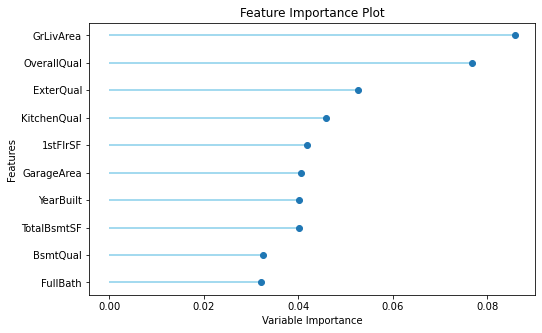

In [13]:
plot_model(rf,'feature') #'learning','vc','error'

Now, in the pipeline best model is now trained anow its time to predict on never seen data

In [14]:
predictions = predict_model(final_blender, data = test)

In [15]:
import os
os.getcwd()

'D:\\'

In [16]:
os.chdir('E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques')

In [17]:
#predictions['Label']
sub_df=pd.read_csv(r'E:\EDU\Projects- Data Science\house-prices-advanced-regression-techniques\test.csv')
datasets=pd.concat([test['Id'],predictions['Label']],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)